In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import random


In [ ]:
x1 = np.random.random_integers(5, 30, 100)
x2 = np.random.normal(30, 5, 100).round(1)
lst = ['A', 'B', 'C', 'D', 'E', 'F']
x3 = random.choices(lst, k=100)
e = np.random.normal(0, 5, 100).round(2)
y = x2+e

<ipython-input-3-9fdd6216967d>:1: DeprecationWarning: This function is deprecated. Please call randint(5, 30 + 1) instead
  x1 = np.random.random_integers(5, 30, 100)


In [ ]:
data = {'Y':y, 'X1':x1, 'X2':x2, 'X3':x3}
df0 = pd.DataFrame(data)

In [ ]:
df0.head(4)

,Y,X1,X2,X3
0,25.65,22,31.6,B
1,34.33,8,27.8,E
2,26.43,23,34.2,C
3,16.75,25,26.2,A


In [ ]:
df0.describe()

,Y,X1,X2
count,100.000000,100.000000,100.000000
mean,29.534800,18.190000,30.245000
std,6.372311,7.419188,4.350418
min,14.200000,5.000000,21.000000
25%,26.077500,11.000000,27.050000
50%,29.970000,18.000000,31.100000
75%,33.687500,24.250000,33.425000
max,46.120000,30.000000,41.600000


In [ ]:
from google.colab import files
df0.to_csv ('df2_2.csv')
files.download('df2_2.csv')

In [ ]:
files.upload()
df=pd.read_csv('df2_2.csv',index_col=0)
df.head()

,Y,X1,X2,X3
0,25.65,22,31.6,B
1,34.33,8,27.8,E
2,26.43,23,34.2,C
3,16.75,25,26.2,A
4,34.58,16,24.6,C


Построим простейший линейный график для y и x3

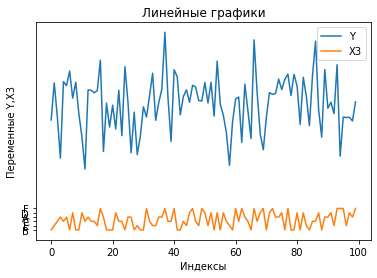

In [ ]:
plt.title('Линейные графики')#заголовок
plt.plot(df.Y)
plt.ylabel('Переменные Y,X3')#метки осей
plt.xlabel('Индексы')
plt.plot(df.X3)
plt.legend(['Y','X3']) #легенда
plt.show()


Так же построим диаграмму рассеяния

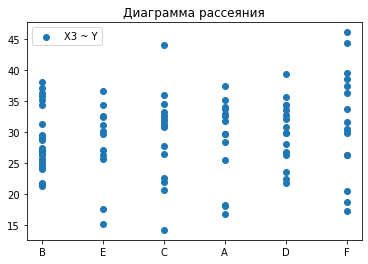

In [ ]:
plt.scatter(df.X3, df.Y)
plt.title('Диаграмма рассеяния')
plt.legend(['X3 ~ Y'])

Очевидно, она принимает точечный вид, поэтому построим такую же диаграмму для Y и X2

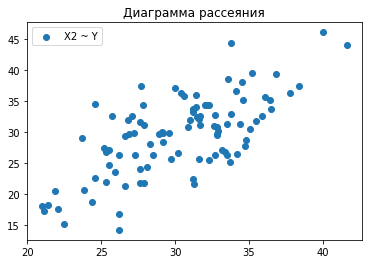

In [ ]:
plt.scatter(df.X2, df.Y)
plt.title('Диаграмма рассеяния')
plt.legend(['X2 ~ Y'])

Не трудно догадаться, что в дальнейшем лучше всего искать парные зависимости для Y и X2, распеределенных неприрывно и дискретно соответственно

Построим график зависимости

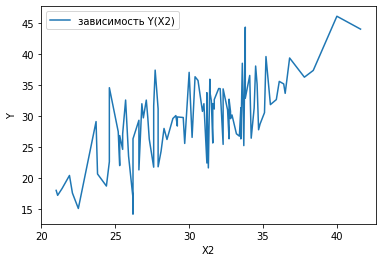

In [ ]:
df1 = df.sort_values(by='X2')
plt.plot(df1.X2, df1.Y)
plt.xlabel('X2')
plt.ylabel('Y')
plt.legend(['зависимость Y(X2)'])

Теперь построим график с областями

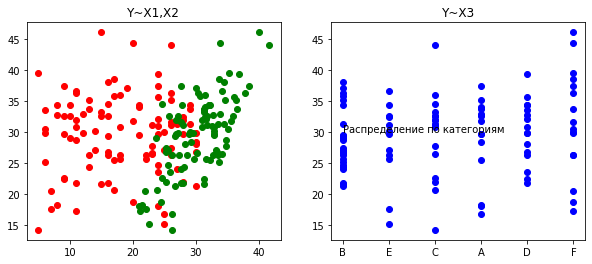

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(10, 4)) #определение фигуры
ax[0].set(title='Y~X1,X2') # заголовок в ax[0]
ax[0].plot(df.X1, df.Y, 'ro') # два графика в ax[0]
ax[0].plot(df.X2, df.Y, 'go')
ax[1].set(title='Y~X3') # заголовок в ax[1]
ax[1].plot(df.X3, df.Y, 'bo') # один график в ax[1]
plt.text(0,30,'Распределение по категориям')# вывод текста в ax[1]
plt.show()

Далее диаграмма диапозонов для Y,X1,X2 и гистограмма частот для X3 и отдельно Y, X2

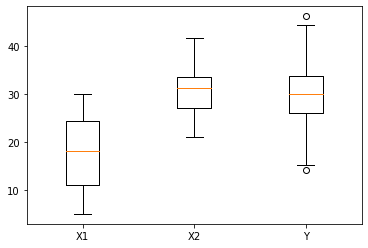

In [ ]:
fig, ax = plt.subplots()
plt.boxplot([df.X1, df.X2,df.Y])
ax.set_xticklabels(['X1','X2','Y'])
plt.show()

(array([24.,  0., 12.,  0., 18.,  0., 14.,  0., 16., 16.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

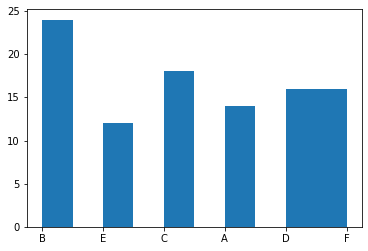

In [ ]:
plt.hist([df.X3])

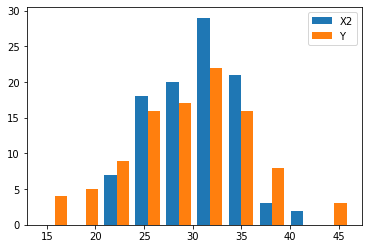

In [ ]:
plt.hist([df.X2,df.Y])
plt.legend(['X2','Y'])


Далее приведем средства библиотеки Pandas совместно с Matplotlib

<Axes: >

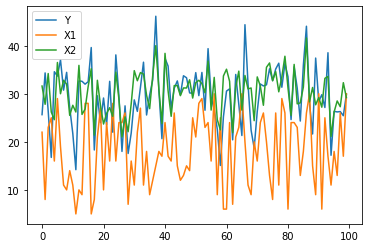

In [ ]:
df.plot()

<Axes: >

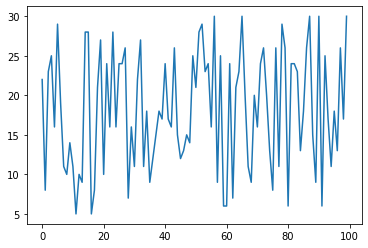

In [ ]:
df.X1.plot()

<Axes: >

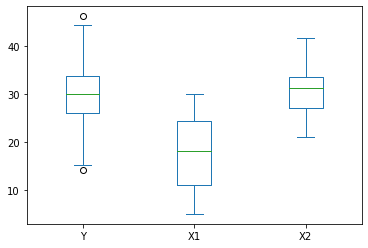

In [ ]:
df.plot.box()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='X2', ylabel='Y'>

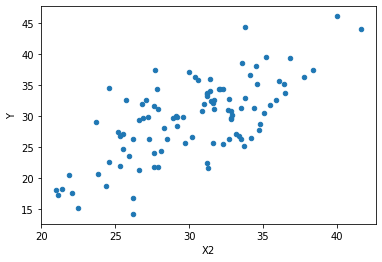

In [ ]:
df.plot.scatter(x='X2', y='Y')

<Axes: ylabel='Frequency'>

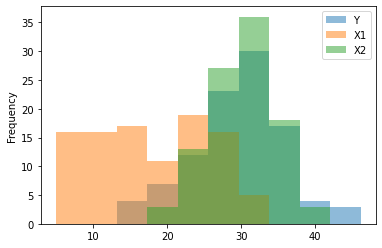

In [ ]:
df.plot.hist(alpha=0.5)


<Axes: ylabel='Density'>

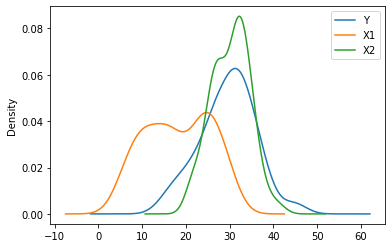

In [ ]:
df.plot.density()

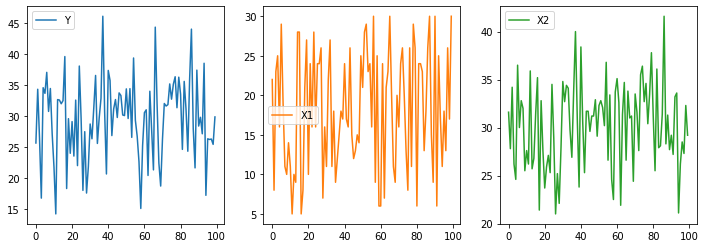

In [ ]:
ax = df.plot(figsize=(12, 4), subplots=True, layout=(1,3))

Теперь для визуального анализа будем использовать Seaborn

Линейный график Y~X2


<Axes: xlabel='X2', ylabel='Y'>

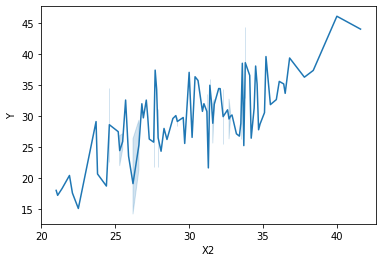

In [ ]:
sns.lineplot(data=df, x='X2', y='Y')

Диаграмма рассеяния X2~X1


<Axes: xlabel='X1', ylabel='X2'>

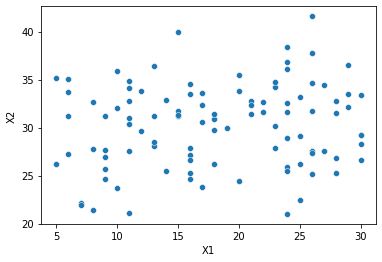

In [ ]:
sns.scatterplot(data=df,x='X1',y='X2')

Диаграмма рассеяния Y~X2 с линией
регрессии


<Axes: xlabel='X2', ylabel='Y'>

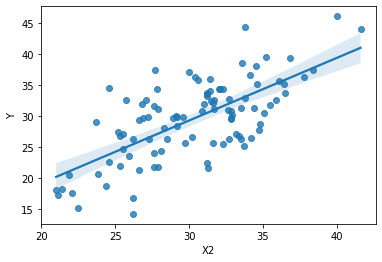

In [ ]:
sns.regplot(data=df, x='X2', y='Y')

Диаграммы диапазонов по всем
переменным


<Axes: >

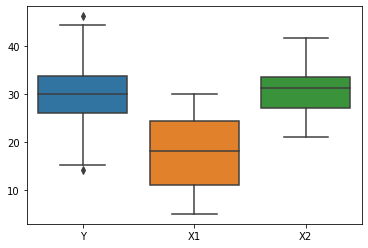

In [ ]:
sns.boxplot(data=df)

<Axes: xlabel='X2', ylabel='Count'>

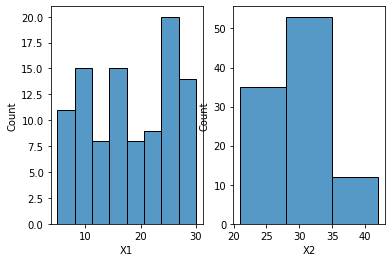

In [ ]:
plt.subplot(1, 2, 1) #область 1
sns.histplot(x='X1',data=df)#гистограмма
plt.subplot(1, 2, 2)
sns.histplot(x='X2',data=df,binwidth=7)

Матричная диаграмма для трех числовых переменных хорошо
поддается анализу, и часто достаточно только её, чтобы сделать какие-то
предположения о переменных выборки.


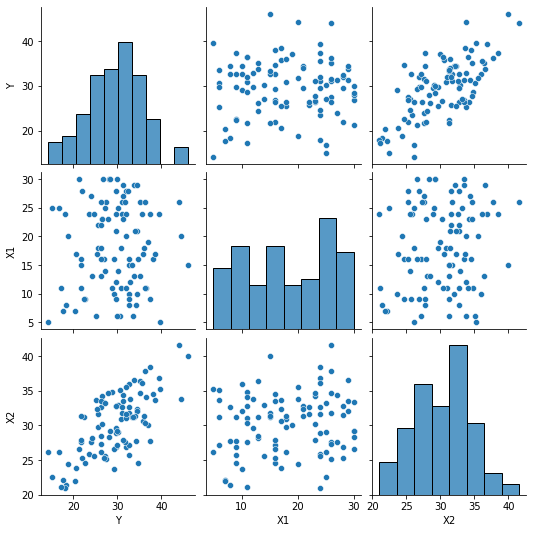

In [ ]:
sns.pairplot(df)

Распределение Y и X2 стремится к нормальному, распределение X1 стремится к равномерному. Трудно сказать, что хоть одна величина коррелирует с другой, все данные получены случайно, так что неразумно пологать обратное.
Теперь построим матричную диаграмму с учетом категорий






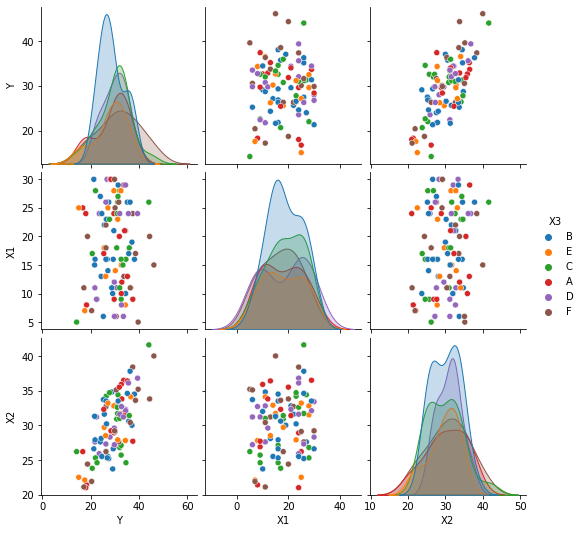

In [ ]:
sns.pairplot(df,hue='X3')


Эта матрица на самом деле практически ничего не показывает, так как данные созданы случайно, хотя в будущем это будет одним из самых главных инструментов интеллектуального анализа данных.